# Implementing Reflection Pattern

- Implementation of reflection pattern in code & use it to improve data visualization

## Imports

In [1]:
import re
import json
import myutils

## Exploratory Data Analysis (EDA)

In [2]:
df = myutils.load_and_prepare_data("data/coffee_sales.csv")
df.sample(n=5)

,date,time,cash_type,card,price,coffee_name,quarter,month,year
2463,2024-12-03,14:18,card,ANON-0000-0000-0819,3.086,Americano with Milk,4,12,2024
2053,2024-10-22,16:35,card,ANON-0000-0000-0507,3.576,Latte,4,10,2024
669,2024-06-01,06:00,card,ANON-0000-0000-0141,2.792,Cortado,2,6,2024
3003,2025-02-08,10:20,card,ANON-0000-0000-1194,2.596,Cortado,1,2,2025
3407,2025-03-07,09:33,card,ANON-0000-0000-1262,3.576,Cocoa,1,3,2025


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3636 non-null   datetime64[ns]
 1   time         3636 non-null   object        
 2   cash_type    3636 non-null   object        
 3   card         3547 non-null   object        
 4   price        3636 non-null   float64       
 5   coffee_name  3636 non-null   object        
 6   quarter      3636 non-null   int32         
 7   month        3636 non-null   int32         
 8   year         3636 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(3), object(4)
memory usage: 213.2+ KB


In [4]:
df.isna().sum()

date            0
time            0
cash_type       0
card           89
price           0
coffee_name     0
quarter         0
month           0
year            0
dtype: int64

In [5]:
display(df[df.isna().any(axis=1)])

,date,time,cash_type,card,price,coffee_name,quarter,month,year
12,2024-03-02,08:52,cash,NaN,4.0,Latte,1,3,2024
18,2024-03-03,07:00,cash,NaN,4.0,Latte,1,3,2024
41,2024-03-06,08:42,cash,NaN,3.5,Americano with Milk,1,3,2024
46,2024-03-07,11:01,cash,NaN,4.0,Latte,1,3,2024
49,2024-03-07,14:30,cash,NaN,4.0,Latte,1,3,2024
...,...,...,...,...,...,...,...,...,...
657,2024-05-31,10:17,cash,NaN,3.9,Latte,2,5,2024
677,2024-06-01,15:56,cash,NaN,3.9,Cocoa,2,6,2024
685,2024-06-02,16:01,cash,NaN,3.4,Americano with Milk,2,6,2024
691,2024-06-03,14:11,cash,NaN,3.4,Americano with Milk,2,6,2024


In [6]:
df.describe()

,date,price,quarter,month,year
count,3636,3636.000000,3636.000000,3636.000000,3636.000000
mean,2024-09-30 11:56:02.376237568,3.174686,2.437844,6.394664,2024.259351
min,2024-03-01 00:00:00,1.812000,1.000000,1.000000,2024.000000
25%,2024-07-03 00:00:00,2.792000,1.000000,3.000000,2024.000000
50%,2024-10-06 12:00:00,3.282000,2.000000,6.000000,2024.000000
75%,2025-01-08 00:00:00,3.576000,4.000000,10.000000,2025.000000
max,2025-03-23 00:00:00,4.000000,4.000000,12.000000,2025.000000
std,NaN,0.491993,1.182280,3.480686,0.438339


- Build agentic workflow that generates data visualizations from dataset.
OBJ: Help answer questions about coffee sales from the vending machine.

## Pipeline Building

### Step1 - Generate Code to Create Chart

Prompt an LLM to write Python code to generate a chart in response to a user query.
* Query **"Create a plot comparing Q1 coffee sales in 2024 and 2025 using the data in coffee_sales.csv"**
* Output: **Python Code using matplotlib library**
Code will be written between `<execute_python>` tags.



In [9]:
def generate_chart_code(instruction: str, model: str, out_path_v1: str) -> str:
    """Generate Python code to make a plot with matplotlib using tag-based wrapping."""

    prompt = f"""
    You are a data visualization expert.

    Return your answer *strictly* in this format:

    <execute_python>
    # valid python code here
    </execute_python>

    Do not add explanations, only the tags and the code.

    The code should create a visualization from a DataFrame 'df' with these columns:
    - date (M/D/YY)
    - time (HH:MM)
    - cash_type (card or cash)
    - card (string)
    - price (number)
    - coffee_name (string)
    - quarter (1-4)
    - month (1-12)
    - year (YYYY)

    User instruction: {instruction}

    Requirements for the code:
    1. Assume the DataFrame is already loaded as 'df'.
    2. Use matplotlib for plotting.
    3. Add clear title, axis labels, and legend if needed.
    4. Save the figure as '{out_path_v1}' with dpi=300.
    5. Do not call plt.show().
    6. Close all plots with plt.close().
    7. Add all necessary import python statements

    Return ONLY the code wrapped in <execute_python> tags.
    """

    response = myutils.get_respose(model, prompt)
    return response

In [48]:
code_v1 = generate_chart_code(
    instruction=r"Create a plot comparing Q1 coffee sales in 2024 and 2025 using the data in the path data\coffee_sales.csv.",
    model="gemini-2.0-flash",
    out_path_v1="chart_v1.png"
)

In [49]:
print(f''' -- Generated Code --
      
    {code_v1}''')

 -- Generated Code --

    ```python
<execute_python>
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is already loaded

# Filter for Q1 and years 2024 and 2025
q1_data_2024 = df[(df['quarter'] == 1) & (df['year'] == 2024)]
q1_data_2025 = df[(df['quarter'] == 1) & (df['year'] == 2025)]

# Group by coffee name and sum the prices for each year
sales_2024 = q1_data_2024.groupby('coffee_name')['price'].sum()
sales_2025 = q1_data_2025.groupby('coffee_name')['price'].sum()

# Create a list of all coffee names (union of both years)
coffee_names = sorted(list(set(sales_2024.index).union(set(sales_2025.index))))

# Create lists to store sales for each coffee name and year
sales_2024_list = [sales_2024.get(coffee, 0) for coffee in coffee_names]
sales_2025_list = [sales_2025.get(coffee, 0) for coffee in coffee_names]

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35
index = range(len(coffee_names))

rects1 = ax.bar(index, sales_2024_list, bar_width, label=

### Step2 - Execute Code and Create Chart

Use of regular expression `re` to extract Python code generated by the LLM.
Once extracted, it'll run to produce the **first draft chart**

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is already loaded

# Filter for Q1 and years 2024 and 2025
q1_data_2024 = df[(df['quarter'] == 1) & (df['year'] == 2024)]
q1_data_2025 = df[(df['quarter'] == 1) & (df['year'] == 2025)]

# Group by coffee name and sum the prices for each year
sales_2024 = q1_data_2024.groupby('coffee_name')['price'].sum()
sales_2025 = q1_data_2025.groupby('coffee_name')['price'].sum()

# Create a list of all coffee names (union of both years)
coffee_names = sorted(list(set(sales_2024.index).union(set(sales_2025.index))))

# Create lists to store sales for each coffee name and year
sales_2024_list = [sales_2024.get(coffee, 0) for coffee in coffee_names]
sales_2025_list = [sales_2025.get(coffee, 0) for coffee in coffee_names]

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35
index = range(len(coffee_names))

rects1 = ax.bar(index, sales_2024_list, bar_width, label='2024')
rects2 = ax.bar([i + bar_width for i in index]

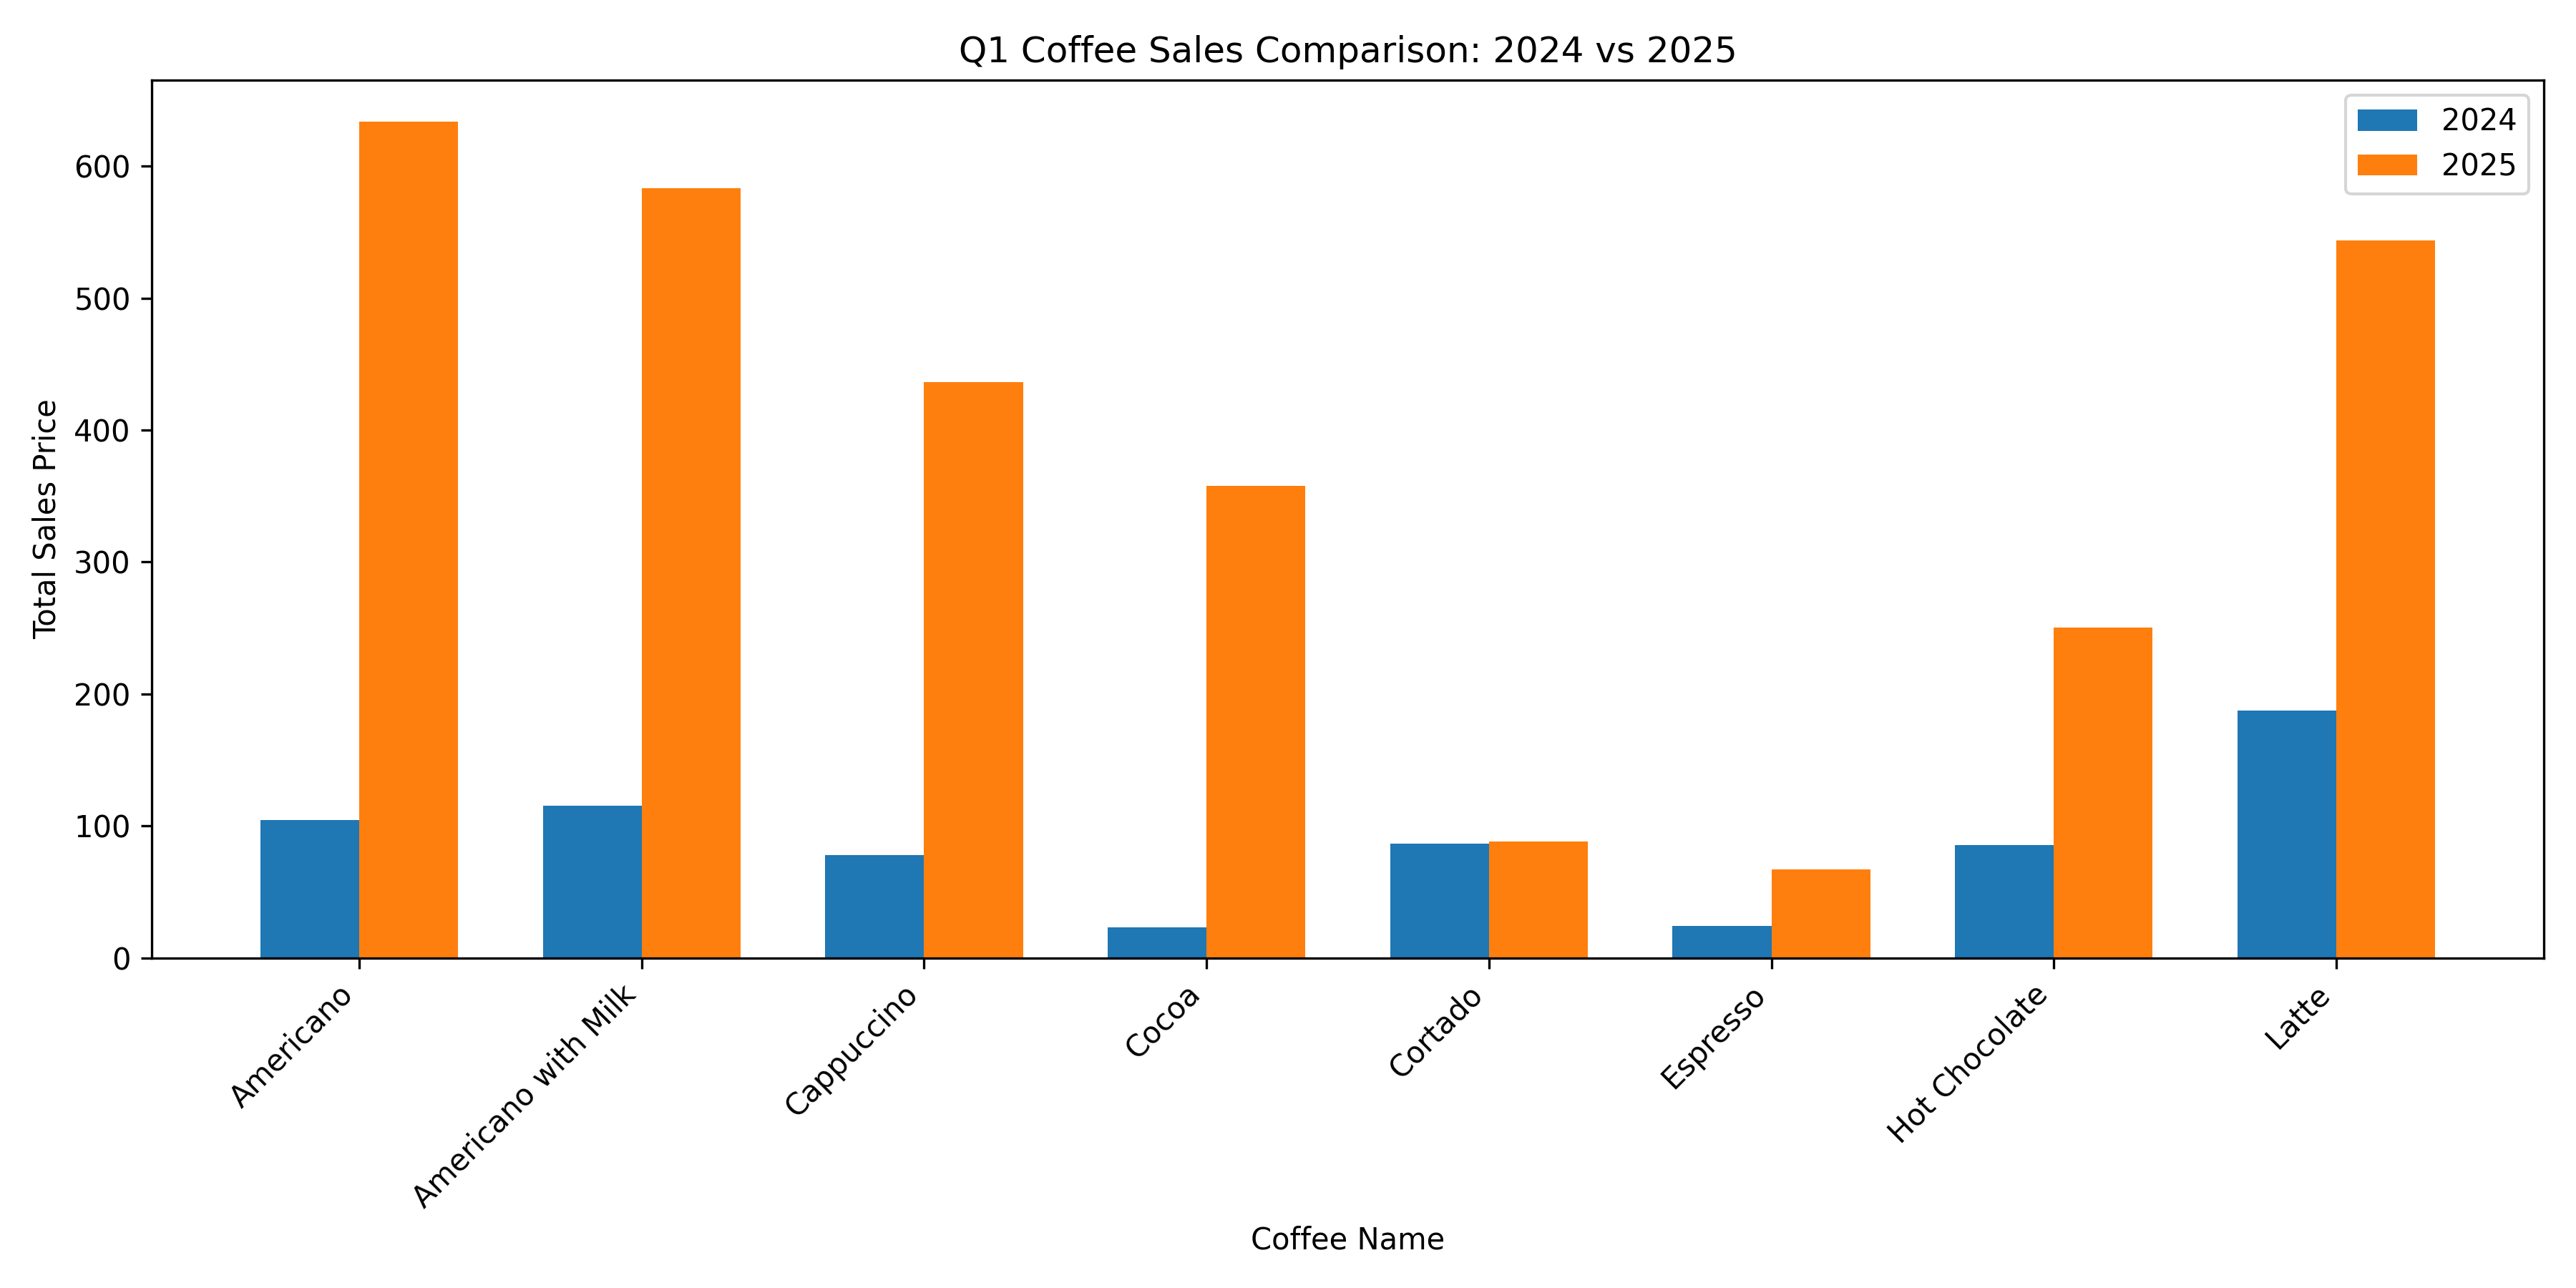

In [50]:
from IPython.display import Image, display
match = re.search(r"<execute_python>([\s\S]*?)</execute_python>", code_v1)
if match:
    initial_code = match.group(1).strip()
    print(initial_code)
    exec_globals = {'df': df}
    exec(initial_code, exec_globals)

    print('Generated Chart (V1)')
    display(Image(filename='chart_v1.png'))
    

## Step 3 - Reflect on the output

Simulate how a human would review a first draft of a chart.

1. Provide chart to LLM
2. Analyze chart visually
3. Generate feedback

Intelligent feedback loop to create critiqued second version V2 of the chart.

In [ ]:
def reflect_on_image_and_generate(
        chart_path: str,
        instruction: str,
        model_name: str,
        out_path_v2: str,
        code_v1: str
) -> tuple[str, str]:
    """
    Critique the chart IMAGE and the original code against the instruction, 
    then return refined matplotlib code.
    Returns (feedback, refined_code_with_tags).
    Supports OpenAI and Anthropic (Claude).
    """